In [126]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv


In [127]:
input_path = "/kaggle/input/commonlit-evaluate-student-summaries/"
df_train_pro_file = pd.read_csv(input_path + 'prompts_train.csv')

df_train_sum_file = pd.read_csv(input_path + 'summaries_train.csv')
df_train_pro_file.info(), df_train_sum_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt_id        4 non-null      object
 1   prompt_question  4 non-null      object
 2   prompt_title     4 non-null      object
 3   prompt_text      4 non-null      object
dtypes: object(4)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  7165 non-null   object 
 1   prompt_id   7165 non-null   object 
 2   text        7165 non-null   object 
 3   content     7165 non-null   float64
 4   wording     7165 non-null   float64
dtypes: float64(2), object(3)
memory usage: 280.0+ KB


(None, None)

In [128]:
df_train_sum_file.isna().sum()

student_id    0
prompt_id     0
text          0
content       0
wording       0
dtype: int64

In [129]:
len(df_train_sum_file['student_id'].unique()), len(df_train_sum_file['prompt_id'].unique()), len(df_train_sum_file['text'].unique())

(7165, 4, 7165)

In [130]:
df_train_sum_file['prompt_id'].unique(), df_train_pro_file['prompt_id']

(array(['814d6b', 'ebad26', '3b9047', '39c16e'], dtype=object),
 0    39c16e
 1    3b9047
 2    814d6b
 3    ebad26
 Name: prompt_id, dtype: object)

# A sample

In [131]:
df_train_sum_file.sample(3)

,student_id,prompt_id,text,content,wording
2293,51b64cfdc5e0,39c16e,Tragedy as described by Aristotle. A tragedy i...,-1.295922,-0.620512
5640,c8bf1399c920,ebad26,The factory would use many tactics to try to c...,0.985008,0.623245
6697,efafffeba613,814d6b,the only reson the experment ended is because ...,-1.072613,-0.999629


In [132]:
df_train_sum_file.iloc[[7018, 3851, 2906]]["text"].map(lambda x: len(x))

7018    165
3851    137
2906    276
Name: text, dtype: int64

In [133]:
df_train_sum_file.iloc[7018]["text"], df_train_sum_file.iloc[3851]["text"], df_train_sum_file.iloc[2906]["text"]

('slaves and farmers were at the bottom. the middle class was made up of skilled workers. the high class was made up of nobles and priests. the pharaoh was at the top.',
 'A perfect tragedy should excite feelings of pity and fear, it should not satisfy moral sense and it should not end well for the hero(es).',
 'The men in the story cant be all good or all bad. The tradgedy should be simple,not complex, and imitate actions that incite fear and pity to the audience. The man cannot move from prosperity to adversity or vise versa because it will not resemble the true spirit of tragedy. ')

In [134]:
df_train_pro_file[df_train_pro_file["prompt_id"] == "3b9047"]

,prompt_id,prompt_question,prompt_title,prompt_text
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...


In [135]:
df_train_pro_file[df_train_pro_file["prompt_id"] == "3b9047"]["prompt_text"]

1    Egyptian society was structured like a pyramid...
Name: prompt_text, dtype: object

# Text analysis

In [136]:
df_train_pro_file['prompt_question'].str.len()

0     77
1    184
2    105
3    104
Name: prompt_question, dtype: int64

In [137]:
df_train_pro_file['length_pquestion'] = df_train_pro_file['prompt_question'].str.len()
df_train_pro_file['length_ptitle'] = df_train_pro_file['prompt_title'].str.len()
df_train_pro_file['length_ptext'] = df_train_pro_file['prompt_text'].str.len()
df_train_pro_file

,prompt_id,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,105,14,3566
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136


In [138]:
df_train_pro_file['prompt_question'].str.isalnum().sum(), df_train_pro_file['prompt_title'].str.isalnum().sum(), df_train_pro_file['prompt_text'].str.isalnum().sum()

(0, 0, 0)

In [139]:
df_train_sum_file['length_text'] = df_train_sum_file['text'].str.len()
df_train_sum_file.nlargest(10, 'length_text')

,student_id,prompt_id,text,content,wording,length_text
6001,d5a135e55d4d,3b9047,The base starts with farmers and slaves. The e...,3.021960,0.708060,3940
2456,574369ff8f20,39c16e,"An ideal tragedy must have a relateable hero, ...",3.369991,3.897941,3711
4011,8d9cd2ec20cb,39c16e,Three elements of an ideal tragedy as describe...,2.807019,1.923362,2957
2088,4aac0bb1600f,3b9047,Ancient Egypt's system of government is differ...,3.160636,3.346665,2839
2825,64f540d9f37d,3b9047,The text says that the social structure works ...,1.959735,2.347619,2793
3800,868796a4397a,ebad26,The first way the factory would cover up spoil...,3.085069,0.609903,2775
6029,d7050b556b1d,3b9047,Here is how the structure of the ancient Egypt...,2.204640,-0.645344,2731
1871,43001fcbea5e,3b9047,The structure of the ancient Egyptian system o...,3.480812,1.206968,2649
2442,56dde857f87f,3b9047,Egyptian society had a very interesting type o...,0.903185,0.295562,2513
6034,d72bca095079,ebad26,"In the novle ""the jungle"" by Upton Sinclair he...",1.819545,1.254679,2412


In [140]:
df_train_sum_file['text'].str.isalnum().sum()

0

# join

In [141]:
df = pd.merge(df_train_sum_file, df_train_pro_file, how='left', on='prompt_id')
len(df) - len(df_train_sum_file), len(df.columns) + 1 - len(df_train_sum_file.columns) - len(df_train_pro_file.columns) 

(0, 0)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        7165 non-null   object 
 1   prompt_id         7165 non-null   object 
 2   text              7165 non-null   object 
 3   content           7165 non-null   float64
 4   wording           7165 non-null   float64
 5   length_text       7165 non-null   int64  
 6   prompt_question   7165 non-null   object 
 7   prompt_title      7165 non-null   object 
 8   prompt_text       7165 non-null   object 
 9   length_pquestion  7165 non-null   int64  
 10  length_ptitle     7165 non-null   int64  
 11  length_ptext      7165 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 671.8+ KB


In [143]:
df.isna().sum()

student_id          0
prompt_id           0
text                0
content             0
wording             0
length_text         0
prompt_question     0
prompt_title        0
prompt_text         0
length_pquestion    0
length_ptitle       0
length_ptext        0
dtype: int64

In [144]:
df.sample(10)

,student_id,prompt_id,text,content,wording,length_text,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext
7032,fb2e9cc17d59,ebad26,Some ways they would combined spolied meat or ...,-0.328151,-0.248892,393,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136
6409,e4e1ff6500b5,3b9047,The structure was the pharaoh at the top and t...,-0.970237,-0.417058,138,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
4913,ae727ce1004c,814d6b,They followed the teacher's instructions and t...,-0.831253,0.550583,199,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,105,14,3566
1748,3f16297ca0d5,39c16e,The ideal tradegy will include these 3 element...,0.088882,-0.594710,219,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364
4754,a869b5ee77d9,ebad26,Jonas had told them how the meat that was take...,-0.579392,-1.089625,279,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136
6090,d96b4c3a4f88,39c16e,You need to have a good complex plan. You also...,-0.834946,-0.593749,149,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364
4225,950837c2b548,39c16e,"A tragedy must include a ""sad(Tragic)"" ending ...",-0.602425,-1.039843,178,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364
5151,b6b823947818,39c16e,"It should have a complex plan, excite pitty an...",-1.547163,-1.461245,141,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364
3870,88ccacb52f2f,814d6b,The Third Wave developed fast due to students ...,-0.627647,-0.125597,182,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,105,14,3566
643,179b5e18e8f9,ebad26,They would rub soda on the meat to take away t...,0.205683,0.380538,294,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136


# Scores

In [145]:
df[df['prompt_id'] == '3b9047']

,student_id,prompt_id,text,content,wording,length_text,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,1370,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,157,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
6,0072b649a88c,3b9047,The Egyptian society is really different from ...,0.205683,0.380538,453,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
10,0089072f5fea,3b9047,We have the gods and then Logan and If Logan ...,-1.547163,-1.461245,131,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
12,008efab52a76,3b9047,The social classes are different because they ...,-0.066112,-0.715083,437,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
...,...,...,...,...,...,...,...,...,...,...,...,...
7152,ff3251e1f495,3b9047,Egypt was like a pyramid at that time period. ...,1.097266,0.496336,709,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
7158,ff66def9f97c,3b9047,The society of ancient Egypt was shaped like a...,0.376374,0.463619,530,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
7159,ff78813d4f7b,3b9047,The ancient Egyptian system was structured lik...,0.531368,0.583991,467,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171,255,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345


In [146]:
# find top content and wording examples
#df[df['prompt_id'] == '3b9047'].nlargest(1,'content') # 2597
#df[df['prompt_id'] == '3b9047'].nsmallest(1, 'content') # 2414
#df[df['prompt_id'] == '3b9047'].nlargest(1,'wording') # 2
#df[df['prompt_id'] == '3b9047'].nsmallest(1, 'wording') # 26

In [147]:
df['gap_content_wording'] = abs(df['content'] - df['wording'])

In [148]:
df[df['prompt_id'] == '3b9047'].nlargest(1,'gap_content_wording') # 6156

,student_id,prompt_id,text,content,wording,length_text,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext,gap_content_wording
6156,dbff14eca67a,3b9047,The Ancient Egyptian system of government was ...,2.813275,-0.485718,1504,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,3.298992


In [149]:
print(df.iloc[2597]['text']) # Very high content 
print()
print(df.iloc[2414]['text']) # Very low content 

The ancient Egyptian system of government was shaped like a pyramid. At the top, the pharaoh was believed to be the human form of a god. He would enact laws, collect taxes, and most importantly, protect Egypt. Right below him were the nobles and priests. "Only nobles could hold government posts"(USHistory.org, paragraph 6) , and "Priests were responsible for pleasing the gods."(USHistory.org, paragraph 6) These two classes made up the aristocracy; together, they helped the pharaoh run Egypt. At the middle of the pyramid, soldiers fought in Egypt's wars, quieted rebellions, and supervised the laborers who were building the pyramids. Skilled laborers were also in this class; "Craftsmen made and sold jewelry, pottery, papyrus products, tools, and other useful things."(USHistory.org, paragraph 9). These people were the utility workers of Egypt: if you wanted something, this was the class most likely to have it. At the bottom of the pyramid, slaves and farmers produced the raw materials tha

In [150]:
print(df.iloc[2]['text']) # Very high wording 
print()
print(df.iloc[26]['text']) # Very low wording

In Egypt, there were many occupations and social classes involved in day-to-day living. In many instances if you were at the bottom of the social ladder you could climb up, you didn't have to stay a peasant you could work to bring your status up. Everyone worshipped the gods Ra, Osiris, and Isis, but also they would worship their pharaohs like gods as well. Under the pharaohs were the priests, they had the responsibility to entertain or please the said god. The Chain of Command was placed to keep everyone in check, not one person could handle all the civilians and treasures without any aid. Like the tax collector, called a vizier like stated they were in charge of collecting the peoples' tax. They were also one of the rare instances who were able to read and write, that's how they were granted "vizier" Also the soldiers did many things as they would fight in wars or "quelled domestic uprisings". They were in charge of getting the slaves, farmers, and peasants to build palaces or the fa

In [151]:
print(df.iloc[6156]['text']) # Very high difference between content and wording: high content, low wording

The Ancient Egyptian system of government was made up of many social classes.  At the top of the pyramid of power were gods.  Gods were feared and Egyptians  believed they could control the universe, by causing famine,  flooding, or death.   The Pharoahs were humans who were also considered gods.  They had absolute power, and when they died they were buried in tombs, which were huge stone pyramids.  Pharoahs were entrusted to providing protection and all laws were inacted by Pharoahs.  Pharoahs needed help with all their duties, and  often appointed a cheif minister called a vizier.  The vizier ensured that taxes were collected, also,  the Pharoah directed the army to protect the people.   Below the Pharoahs, were powerful nobles and preists.  Only nobles profited and could hold positions in government, and preists were responsible for pleasing the gods.  Nobles grew rich and enjoyed great status from donations to the gods.  Next,  soldiers supervised peasants, farmers, and slaves.  Th

# Numbers analysis

In [152]:
df.select_dtypes(['int','float']).describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
content,7165.000000,-0.014853,1.043569,-1.729859,-0.799545,-0.093814,0.499660,3.900326
wording,7165.000000,-0.063072,1.036048,-1.962614,-0.872720,-0.081769,0.503833,4.310693
length_text,7165.000000,418.776971,307.833685,114.000000,216.000000,320.000000,513.000000,3940.000000
length_pquestion,7165.000000,118.833775,42.239220,77.000000,77.000000,104.000000,184.000000,184.000000
length_ptitle,7165.000000,18.443126,6.430382,10.000000,10.000000,23.000000,25.000000,25.000000
length_ptext,7165.000000,3883.406420,781.927417,3345.000000,3345.000000,3364.000000,5136.000000,5136.000000
gap_content_wording,7165.000000,0.557988,0.478118,0.000169,0.174855,0.465765,0.795532,3.395007


<Axes: >

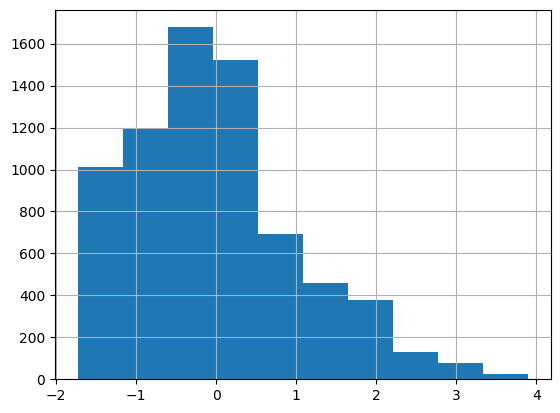

In [153]:
df['content'].hist()

<Axes: >

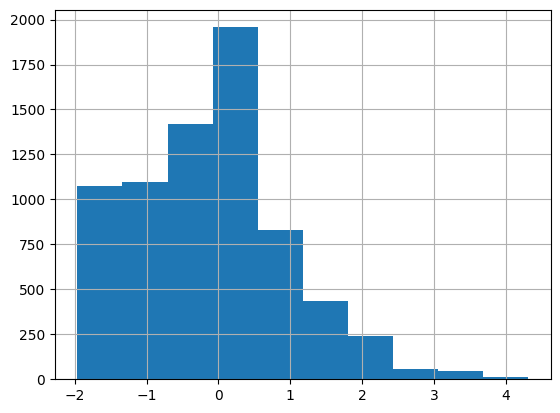

In [154]:
df['wording'].hist()

In [155]:
df.corr(numeric_only=True).T.style.background_gradient(cmap='Blues')

,content,wording,length_text,length_pquestion,length_ptitle,length_ptext,gap_content_wording
content,1.000000,0.751380,0.797244,0.047546,0.016116,-0.038325,0.298058
wording,0.751380,1.000000,0.540138,0.013004,-0.077950,-0.121424,0.094573
length_text,0.797244,0.540138,1.000000,0.160647,0.150458,0.001612,0.321551
length_pquestion,0.047546,0.013004,0.160647,1.000000,0.780043,-0.245276,0.099836
length_ptitle,0.016116,-0.077950,0.150458,0.780043,1.000000,0.413007,0.073944
length_ptext,-0.038325,-0.121424,0.001612,-0.245276,0.413007,1.000000,-0.024099
gap_content_wording,0.298058,0.094573,0.321551,0.099836,0.073944,-0.024099,1.000000


array([[<Axes: xlabel='content', ylabel='content'>,
        <Axes: xlabel='wording', ylabel='content'>,
        <Axes: xlabel='length_text', ylabel='content'>,
        <Axes: xlabel='length_pquestion', ylabel='content'>,
        <Axes: xlabel='length_ptitle', ylabel='content'>,
        <Axes: xlabel='length_ptext', ylabel='content'>,
        <Axes: xlabel='gap_content_wording', ylabel='content'>],
       [<Axes: xlabel='content', ylabel='wording'>,
        <Axes: xlabel='wording', ylabel='wording'>,
        <Axes: xlabel='length_text', ylabel='wording'>,
        <Axes: xlabel='length_pquestion', ylabel='wording'>,
        <Axes: xlabel='length_ptitle', ylabel='wording'>,
        <Axes: xlabel='length_ptext', ylabel='wording'>,
        <Axes: xlabel='gap_content_wording', ylabel='wording'>],
       [<Axes: xlabel='content', ylabel='length_text'>,
        <Axes: xlabel='wording', ylabel='length_text'>,
        <Axes: xlabel='length_text', ylabel='length_text'>,
        <Axes: xlabel='len

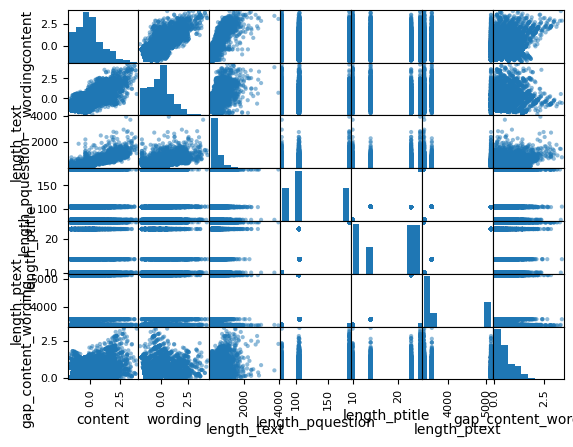

In [156]:
pd.plotting.scatter_matrix(df)

# scaling

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           7165 non-null   object 
 1   prompt_id            7165 non-null   object 
 2   text                 7165 non-null   object 
 3   content              7165 non-null   float64
 4   wording              7165 non-null   float64
 5   length_text          7165 non-null   int64  
 6   prompt_question      7165 non-null   object 
 7   prompt_title         7165 non-null   object 
 8   prompt_text          7165 non-null   object 
 9   length_pquestion     7165 non-null   int64  
 10  length_ptitle        7165 non-null   int64  
 11  length_ptext         7165 non-null   int64  
 12  gap_content_wording  7165 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 727.8+ KB


In [158]:
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

set_config(transform_output="pandas")

scaler = ColumnTransformer([("scaled", StandardScaler(), ['content', 'wording'])], remainder='passthrough')
df = scaler.fit_transform(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   scaled__content                 7165 non-null   float64
 1   scaled__wording                 7165 non-null   float64
 2   remainder__student_id           7165 non-null   object 
 3   remainder__prompt_id            7165 non-null   object 
 4   remainder__text                 7165 non-null   object 
 5   remainder__length_text          7165 non-null   int64  
 6   remainder__prompt_question      7165 non-null   object 
 7   remainder__prompt_title         7165 non-null   object 
 8   remainder__prompt_text          7165 non-null   object 
 9   remainder__length_pquestion     7165 non-null   int64  
 10  remainder__length_ptitle        7165 non-null   int64  
 11  remainder__length_ptext         7165 non-null   int64  
 12  remainder__gap_content_wording  71

In [159]:
d = {}
for c in df.columns:
    if c.startswith('scaled__'):
        d[c] = c[8:]
    elif c.startswith('remainder__'):
        d[c] = c[11:]
df = df.rename(columns = d)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   content              7165 non-null   float64
 1   wording              7165 non-null   float64
 2   student_id           7165 non-null   object 
 3   prompt_id            7165 non-null   object 
 4   text                 7165 non-null   object 
 5   length_text          7165 non-null   int64  
 6   prompt_question      7165 non-null   object 
 7   prompt_title         7165 non-null   object 
 8   prompt_text          7165 non-null   object 
 9   length_pquestion     7165 non-null   int64  
 10  length_ptitle        7165 non-null   int64  
 11  length_ptext         7165 non-null   int64  
 12  gap_content_wording  7165 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 727.8+ KB


# string cleaning up

In [160]:
import re


detected_chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.(),:;!- %[]"/*+”“¨—?`´ ́#$…\n\t\'»«🤮ś{}&’–éèà@ùê=\\><Ëá '

def get_non_alpha(text):
    match = []
    for c in text:
        if c not in detected_chars:
            match.append(c)
    return set(match) 
   

phrase= "The Knicks game yesterday was great!!! The Kni\t\ncks won 112-92 at MSG"
print(get_non_alpha(phrase))


set()


In [161]:
df['non_alpha'] = df['text'].map(lambda x : get_non_alpha(x))
df[df['non_alpha'].str.len() > 0]

,content,wording,student_id,prompt_id,text,length_text,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext,gap_content_wording,non_alpha
566,2.096591,0.291791,153a6f703ef4,3b9047,At the top of the social class was the Pharaoh...,808,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,1.933716,{̈}
1271,0.851761,0.905933,2e255f19874b,3b9047,The different social classes involved in the g...,857,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,0.001495,{​}
1727,0.011871,0.017021,3e7615c174b4,39c16e,3 elements of an ideal tragedy described by Ar...,553,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364,0.042973,{ }
1823,1.450883,0.983308,41a9a20a0f21,39c16e,"As defined by Aristotle, three aspects of the ...",605,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364,0.543528,{ }
2101,-0.812976,-0.907888,4b1b21049038,3b9047,a lot of skilled workers helped make the middl...,307,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,0.140431,{̈}
2989,-1.468438,-1.349619,6a4f08e587bd,ebad26,(Paragraph 2) ̈ Jonas had told them how the me...,213,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136,0.085918,{̈}
4518,0.851761,0.905933,a0008497184c,ebad26,There were many ways the factory could cover u...,605,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136,0.001495,{̈}
4864,2.233620,1.548574,ac95e2ef5f27,ebad26,"In Upton Sinclair's novel ""The Jungle,"" Sincla...",1125,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136,0.774708,{​}
6219,1.752424,0.087159,de1b500f4d4c,3b9047,The structure of the ancient Egyptian system o...,803,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,1.786573,{̈}
6787,-0.926129,-1.434231,f29a9f3f7713,39c16e,"Tragedies, according to Aristotle, should foll...",257,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364,0.567635,{ }


In [162]:
# use normalizer from the tokenizer to check those chars
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-small', use_fast=True)
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are    ü?"))
print(tokenizer.backend_tokenizer.normalizer.normalize_str(detected_chars)) # not very useful

# TODO do check for [UNK] tokens in the tokenizer
encoding = tokenizer.encode("Héllò hôw are    ü?")
print(encoding)
print(tokenizer.decode(encoding))
print()
encoding = tokenizer.encode(detected_chars)
print(encoding)
print(tokenizer.decode(encoding))
print()
encoding = tokenizer.encode("🤮")
print(encoding)
print(tokenizer.decode(encoding))



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Héllò hôw are ü?
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.(),:;!- %[]"/*+”“ ̈—?` ́ ́#$... '»«🤮ś{}&’–éèà@ùê=\><Ëá
[1, 93519, 436, 27996, 3807, 22873, 2985, 281, 64035, 302, 2]
[CLS] Héllò hôw are ü?[SEP]

[1, 65748, 30575, 18527, 61201, 38686, 1967, 1492, 70722, 268, 9590, 94625, 71705, 28307, 63921, 24035, 476, 64993, 20087, 11529, 67682, 83874, 26676, 1975, 105723, 693, 120304, 51535, 260, 555, 285, 261, 294, 346, 300, 271, 4639, 2550, 592, 309, 320, 1225, 1186, 318, 3204, 34198, 644, 302, 5459, 7077, 7077, 2669, 1814, 260, 260, 260, 382, 10716, 37204, 3, 37409, 19976, 14986, 974, 276, 958, 5858, 19831, 14509, 1683, 42742, 20653, 1510, 2620, 1504, 4052, 103299, 10673, 2]
[CLS] abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.(),:;!- %[]"/*+”“ ̈—?` ́ ́#$... '»«[UNK]ś{}&’–éèà@ùê=\><Ëá[SEP]

[1, 507, 3, 2]
[CLS] [UNK][SEP]


In [163]:
df['decoded'] = df['text'].map(lambda x : "[UNK]" in tokenizer.decode(tokenizer.encode(x)))

In [164]:
df[df["decoded"] == True]

,content,wording,student_id,prompt_id,text,length_text,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext,gap_content_wording,non_alpha,decoded
2766,-0.074219,-0.944771,62fe359918f5,ebad26,The different ways the factory would use or co...,951,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136,0.949532,{},True


In [165]:
df.loc[2766]["text"]

'The different ways the factory would use or cover up spoiled meat are,"Jonas had told them how the meat that was taken out of pickle would often be found sour, and how they would rub it up with soda to take away the smell." "Europe old sausage that had been rejected, and that was moldy and white – it would be dosed with borax and glycerin, and dumped into the hoppers, and made over again for home consumption."These rats were nuisances, and the packers would put poisoned bread out for them; they would die, and then rats, bread, and meat would go into the hoppers together. This is no fairy story and no joke; the meat would be shoveled into carts, and the man who did the shoveling would not trouble to lift out a rat even when he saw one – there were things that went into the sausage in comparison with which a poisoned rat was a tidbit." These are some of the disgusting things that the factory did to cover up or use in meats. DISGUSTING!! 🤮 '

# Create dataset

In [166]:
from datasets import Dataset

ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['content', 'wording', 'student_id', 'prompt_id', 'text', 'length_text', 'prompt_question', 'prompt_title', 'prompt_text', 'length_pquestion', 'length_ptitle', 'length_ptext', 'gap_content_wording', 'non_alpha', 'decoded'],
    num_rows: 7165
})

In [167]:
ds = ds.train_test_split(test_size=0.1, shuffle=True)
# TODO stratify_by_column="prompt_id",  does not work!
ds

DatasetDict({
    train: Dataset({
        features: ['content', 'wording', 'student_id', 'prompt_id', 'text', 'length_text', 'prompt_question', 'prompt_title', 'prompt_text', 'length_pquestion', 'length_ptitle', 'length_ptext', 'gap_content_wording', 'non_alpha', 'decoded'],
        num_rows: 6448
    })
    test: Dataset({
        features: ['content', 'wording', 'student_id', 'prompt_id', 'text', 'length_text', 'prompt_question', 'prompt_title', 'prompt_text', 'length_pquestion', 'length_ptitle', 'length_ptext', 'gap_content_wording', 'non_alpha', 'decoded'],
        num_rows: 717
    })
})

In [168]:
ds = ds.remove_columns(['length_text', 'length_pquestion', 'length_ptitle', 'length_ptext', 'gap_content_wording', 'non_alpha'])
ds

DatasetDict({
    train: Dataset({
        features: ['content', 'wording', 'student_id', 'prompt_id', 'text', 'prompt_question', 'prompt_title', 'prompt_text', 'decoded'],
        num_rows: 6448
    })
    test: Dataset({
        features: ['content', 'wording', 'student_id', 'prompt_id', 'text', 'prompt_question', 'prompt_title', 'prompt_text', 'decoded'],
        num_rows: 717
    })
})

In [169]:
# TODO need split for CV https://github.com/trent-b/iterative-stratification

In [170]:
df_sub = pd.read_csv(input_path + 'sample_submission.csv')
df_subt = pd.read_csv(input_path + 'summaries_test.csv')
df_subs = pd.read_csv(input_path + 'prompts_test.csv')
df_subt

,student_id,prompt_id,text
0,000000ffffff,abc123,Example text 1
1,111111eeeeee,def789,Example text 2
2,222222cccccc,abc123,Example text 3
3,333333dddddd,def789,Example text 4


# CV and folding

In [171]:
df_train_pro_file, df_subs # prompts id are different in submissions, will probably be different in competition as well

(  prompt_id                                    prompt_question  \
 0    39c16e  Summarize at least 3 elements of an ideal trag...   
 1    3b9047  In complete sentences, summarize the structure...   
 2    814d6b  Summarize how the Third Wave developed over su...   
 3    ebad26  Summarize the various ways the factory would u...   
 
                 prompt_title  \
 0                 On Tragedy   
 1  Egyptian Social Structure   
 2             The Third Wave   
 3    Excerpt from The Jungle   
 
                                          prompt_text  length_pquestion  \
 0  Chapter 13 \r\nAs the sequel to what has alrea...                77   
 1  Egyptian society was structured like a pyramid...               184   
 2  Background \r\nThe Third Wave experiment took ...               105   
 3  With one member trimming beef in a cannery, an...               104   
 
    length_ptitle  length_ptext  
 0             10          3364  
 1             25          3345  
 2             14

In [172]:
from sklearn.model_selection import GroupKFold

group_kfold = GroupKFold(n_splits=4)
X = ds["train"]
groups = ds["train"]["prompt_id"]

iterations_needed = group_kfold.get_n_splits(X, None, groups)
print(iterations_needed)

print(groups[:10])

    

4
['39c16e', '3b9047', '3b9047', 'ebad26', '3b9047', '3b9047', '39c16e', '814d6b', '814d6b', '814d6b']


In [173]:
for i, (train_index, test_index) in enumerate(group_kfold.split(X, None, groups)):
    print(f"Fold {i}: {train_index[:5]}, {test_index[:5]}")
    print(f"groups in Train: index={train_index[:5]}, group={set([groups[i] for i in train_index])}")
    print(f"groups in Test: index={test_index[:5]}, group={set([groups[i] for i in test_index])}")


Fold 0: [1 2 3 4 5], [ 0  6 11 14 18]
groups in Train: index=[1 2 3 4 5], group={'3b9047', 'ebad26', '814d6b'}
groups in Test: index=[ 0  6 11 14 18], group={'39c16e'}
Fold 1: [0 3 6 7 8], [ 1  2  4  5 13]
groups in Train: index=[0 3 6 7 8], group={'39c16e', 'ebad26', '814d6b'}
groups in Test: index=[ 1  2  4  5 13], group={'3b9047'}
Fold 2: [0 1 2 4 5], [ 3 10 12 16 24]
groups in Train: index=[0 1 2 4 5], group={'3b9047', '39c16e', '814d6b'}
groups in Test: index=[ 3 10 12 16 24], group={'ebad26'}
Fold 3: [0 1 2 3 4], [ 7  8  9 15 27]
groups in Train: index=[0 1 2 3 4], group={'3b9047', '39c16e', 'ebad26'}
groups in Test: index=[ 7  8  9 15 27], group={'814d6b'}


# Add grammar check feature

In [174]:
!pip install pyspellchecker

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [175]:
from spellchecker import SpellChecker

spell = SpellChecker()
spell.distance = 2

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])
print(len(misspelled))
misspelled = spell.unknown(['something is hapenning here'])
print(len(misspelled))
misspelled = spell.unknown(['Chapter 13 \r\nAs the sequel to what has alrea'])
print(len(misspelled))

1
1
0


In [176]:
test = [i for i in 'Chapter 13 \r\nAs the sequel to what has alrea'.split()]
print(test)
misspelled = spell.unknown(test)
print(len(misspelled))

['Chapter', '13', 'As', 'the', 'sequel', 'to', 'what', 'has', 'alrea']
1


In [177]:
t = df.loc[2765]["text"]
print(t)
len(spell.unknown([t[50]]))

Differennt social classes were involvedx in this government becasue in the social pyramid ancient egypt the pharaoh and thoes associated with . The passage states working with the vizier were scribes who kept government records and slaves who were involed in building such strures as pyramids and the passage stated Craftspersond made and sold jewerlry,pottery,papyrus products,tools and other useful things.


0

In [178]:
test = [i for i in t.split()]
print(test)
misspelled = spell.unknown(test)
print(len(misspelled))

['Differennt', 'social', 'classes', 'were', 'involvedx', 'in', 'this', 'government', 'becasue', 'in', 'the', 'social', 'pyramid', 'ancient', 'egypt', 'the', 'pharaoh', 'and', 'thoes', 'associated', 'with', '.', 'The', 'passage', 'states', 'working', 'with', 'the', 'vizier', 'were', 'scribes', 'who', 'kept', 'government', 'records', 'and', 'slaves', 'who', 'were', 'involed', 'in', 'building', 'such', 'strures', 'as', 'pyramids', 'and', 'the', 'passage', 'stated', 'Craftspersond', 'made', 'and', 'sold', 'jewerlry,pottery,papyrus', 'products,tools', 'and', 'other', 'useful', 'things.']
9


In [179]:
df['spelling-errors'] = df['text'].map(lambda x : len(spell.unknown([i for i in x.split()])))

In [180]:
df['spelling-score'] = df['spelling-errors'] / len(df['text']) * 1000

In [181]:
df.nlargest(5,'spelling-score')

,content,wording,student_id,prompt_id,text,length_text,prompt_question,prompt_title,prompt_text,length_pquestion,length_ptitle,length_ptext,gap_content_wording,non_alpha,decoded,spelling-errors,spelling-score
2825,1.892280,2.326976,64f540d9f37d,3b9047,The text says that the social structure works ...,2793,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,0.387884,{},False,101,14.096301
6001,2.910228,0.744353,d5a135e55d4d,3b9047,The base starts with farmers and slaves. The e...,3940,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,184,25,3345,2.313900,{},False,94,13.119330
3800,2.970706,0.649605,868796a4397a,ebad26,The first way the factory would cover up spoil...,2775,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136,2.475166,{},False,71,9.909281
6034,1.757934,1.271990,d72bca095079,ebad26,"In the novle ""the jungle"" by Upton Sinclair he...",2412,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",104,23,5136,0.564866,{},False,67,9.351012
2456,3.243752,3.823460,574369ff8f20,39c16e,"An ideal tragedy must have a relateable hero, ...",3711,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,77,10,3364,0.527949,{},False,66,9.211445


In [182]:
df.corr(numeric_only=True).T.style.background_gradient(cmap='Blues')

,content,wording,length_text,length_pquestion,length_ptitle,length_ptext,gap_content_wording,decoded,spelling-errors,spelling-score
content,1.000000,0.751380,0.797244,0.047546,0.016116,-0.038325,0.298058,-0.000877,0.694396,0.694396
wording,0.751380,1.000000,0.540138,0.013004,-0.077950,-0.121424,0.094573,-0.011162,0.412939,0.412939
length_text,0.797244,0.540138,1.000000,0.160647,0.150458,0.001612,0.321551,0.020428,0.899370,0.899370
length_pquestion,0.047546,0.013004,0.160647,1.000000,0.780043,-0.245276,0.099836,-0.004149,0.236582,0.236582
length_ptitle,0.016116,-0.077950,0.150458,0.780043,1.000000,0.413007,0.073944,0.008373,0.216677,0.216677
length_ptext,-0.038325,-0.121424,0.001612,-0.245276,0.413007,1.000000,-0.024099,0.018928,-0.015404,-0.015404
gap_content_wording,0.298058,0.094573,0.321551,0.099836,0.073944,-0.024099,1.000000,0.009676,0.313244,0.313244
decoded,-0.000877,-0.011162,0.020428,-0.004149,0.008373,0.018928,0.009676,1.000000,0.018522,0.018522
spelling-errors,0.694396,0.412939,0.899370,0.236582,0.216677,-0.015404,0.313244,0.018522,1.000000,1.000000
spelling-score,0.694396,0.412939,0.899370,0.236582,0.216677,-0.015404,0.313244,0.018522,1.000000,1.000000
